In [1]:
# importing necessary libraries for reading the dataset

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('insurance_fraud.csv')

In [4]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [5]:
# checking the datatype

In [6]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [7]:
# checking for null values present in dataset or not

In [8]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [9]:
# column named "_c39" seems like that is a blank column,no entry present in column

In [10]:
# lets delete it

In [11]:
df = df.drop(columns='_c39')

In [12]:
# because many of columns are in object datatype so we ahve to encode those all columns

In [13]:
# let's import encoder

In [14]:
from sklearn.preprocessing import LabelEncoder

lab_enc = LabelEncoder()

In [15]:
from sklearn.preprocessing import OrdinalEncoder

In [16]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [17]:
df['months_as_customer'].isna().sum()

0

In [18]:
df['age'].isna().sum()

0

In [19]:
df['policy_number'].isna().sum()

0

In [20]:
df['policy_bind_date'].isna().sum()

0

In [21]:
df['policy_bind_date'].unique()

array(['17-10-2014', '27-06-2006', '06-09-2000', '25-05-1990',
       '06-06-2014', '12-10-2006', '04-06-2000', '03-02-1990',
       '05-02-1997', '25-07-2011', '26-05-2002', '29-05-1999',
       '20-11-1997', '26-10-2012', '28-12-1998', '19-10-1992',
       '08-06-2005', '15-11-2004', '28-12-2014', '02-08-1992',
       '25-06-2002', '27-11-2005', '27-05-1994', '08-02-1991',
       '02-02-1996', '05-12-2013', '20-09-1990', '18-07-2002',
       '08-02-1990', '04-03-2014', '18-02-2000', '19-06-2008',
       '01-08-2003', '04-04-1992', '13-01-1991', '08-08-2010',
       '09-03-2003', '03-02-1993', '25-11-2002', '27-07-1997',
       '08-05-1995', '30-08-2012', '30-04-2006', '13-04-2003',
       '05-12-2007', '21-08-2006', '08-01-1990', '18-03-1990',
       '07-01-2008', '10-03-1997', '10-01-2004', '20-08-1994',
       '02-06-2002', '28-04-1994', '17-08-2014', '11-08-2007',
       '20-11-2008', '18-10-1995', '19-05-1993', '26-02-2005',
       '14-02-1990', '30-09-1993', '10-06-2014', '28-10

In [22]:
df['policy_bind_date'] = lab_enc.fit_transform(df['policy_bind_date'])

In [23]:
df['policy_state'].isna().sum()

0

In [24]:
df['policy_state'].unique()

array(['OH', 'IN', 'IL'], dtype=object)

In [25]:
df['policy_state'] = lab_enc.fit_transform(df['policy_state'])

In [26]:
df['policy_csl'].isna().sum()

0

In [27]:
df['policy_csl'].unique()

array(['250/500', '100/300', '500/1000'], dtype=object)

In [28]:
df['policy_csl'] = lab_enc.fit_transform(df['policy_csl'])

In [29]:
df['policy_deductable'].isna().sum()

0

In [30]:
df['policy_annual_premium'].isna().sum()

0

In [31]:
df['umbrella_limit'].isna().sum()

0

In [32]:
df['insured_zip'].isna().sum()

0

In [33]:
df['insured_sex'].isna().sum()

0

In [34]:
df['insured_sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [35]:
df['insured_sex'] = lab_enc.fit_transform(df['insured_sex'])

In [36]:
df['insured_education_level'].isna().sum()

0

In [37]:
df['insured_education_level'].unique()

array(['MD', 'PhD', 'Associate', 'Masters', 'High School', 'College',
       'JD'], dtype=object)

In [38]:
ord_enc = OrdinalEncoder(categories=[['High School','College','Masters','PhD','Associate','JD','MD']])

df['insured_education_level'] = ord_enc.fit_transform(df[['insured_education_level']])

In [39]:
df['insured_occupation'].isna().sum()

0

In [40]:
df['insured_occupation'].unique()

array(['craft-repair', 'machine-op-inspct', 'sales', 'armed-forces',
       'tech-support', 'prof-specialty', 'other-service',
       'priv-house-serv', 'exec-managerial', 'protective-serv',
       'transport-moving', 'handlers-cleaners', 'adm-clerical',
       'farming-fishing'], dtype=object)

In [41]:
df['insured_occupation'] = lab_enc.fit_transform(df['insured_occupation'])

In [42]:
df['insured_hobbies'].isna().sum()

0

In [43]:
df['insured_hobbies'].unique()

array(['sleeping', 'reading', 'board-games', 'bungie-jumping',
       'base-jumping', 'golf', 'camping', 'dancing', 'skydiving',
       'movies', 'hiking', 'yachting', 'paintball', 'chess', 'kayaking',
       'polo', 'basketball', 'video-games', 'cross-fit', 'exercise'],
      dtype=object)

In [44]:
df['insured_hobbies'] = lab_enc.fit_transform(df['insured_hobbies'])

In [45]:
df['insured_relationship'].isna().sum()

0

In [46]:
df['insured_relationship'].unique()

array(['husband', 'other-relative', 'own-child', 'unmarried', 'wife',
       'not-in-family'], dtype=object)

In [47]:
ord_enc = OrdinalEncoder(categories=[['not-in-family','unmarried','own-child','wife','husband','other-relative']])

df['insured_relationship'] = ord_enc.fit_transform(df[['insured_relationship']])

In [48]:
df['capital-gains'].isna().sum()

0

In [49]:
df['capital-loss'].isna().sum()

0

In [50]:
df['incident_date'].isna().sum()

0

In [51]:
df['incident_date'].unique()

array(['25-01-2015', '21-01-2015', '22-02-2015', '10-01-2015',
       '17-02-2015', '02-01-2015', '13-01-2015', '27-02-2015',
       '30-01-2015', '05-01-2015', '06-01-2015', '15-02-2015',
       '22-01-2015', '08-01-2015', '15-01-2015', '29-01-2015',
       '19-01-2015', '01-01-2015', '10-02-2015', '11-01-2015',
       '24-02-2015', '09-01-2015', '28-01-2015', '07-01-2015',
       '18-01-2015', '28-02-2015', '12-02-2015', '24-01-2015',
       '03-01-2015', '16-01-2015', '14-02-2015', '21-02-2015',
       '18-02-2015', '26-02-2015', '17-01-2015', '27-01-2015',
       '11-02-2015', '12-01-2015', '06-02-2015', '20-01-2015',
       '02-02-2015', '20-02-2015', '08-02-2015', '23-02-2015',
       '01-03-2015', '14-01-2015', '19-02-2015', '09-02-2015',
       '26-01-2015', '23-01-2015', '31-01-2015', '03-02-2015',
       '01-02-2015', '05-02-2015', '25-02-2015', '16-02-2015',
       '13-02-2015', '04-02-2015', '07-02-2015', '04-01-2015'],
      dtype=object)

In [52]:
df['incident_date'] = lab_enc.fit_transform(df['incident_date'])

In [53]:
df['incident_type'].isna().sum()

0

In [54]:
df['incident_type'].unique()

array(['Single Vehicle Collision', 'Vehicle Theft',
       'Multi-vehicle Collision', 'Parked Car'], dtype=object)

In [55]:
df['incident_type'] = lab_enc.fit_transform(df['incident_type'])

In [56]:
df['collision_type'].isna().sum()

0

In [57]:
df['collision_type'].unique()

array(['Side Collision', '?', 'Rear Collision', 'Front Collision'],
      dtype=object)

In [58]:
df['collision_type'] = lab_enc.fit_transform(df['collision_type'])

In [59]:
df['incident_severity'].isna().sum()

0

In [60]:
df['incident_severity'].unique()

array(['Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage'],
      dtype=object)

In [61]:
ord_enc = OrdinalEncoder(categories=[['Trivial Damage','Minor Damage','Major Damage','Total Loss']])

df['incident_severity'] = ord_enc.fit_transform(df[['incident_severity']])

In [62]:
df['authorities_contacted'].isna().sum()

0

In [63]:
df['authorities_contacted'].unique()

array(['Police', 'None', 'Fire', 'Other', 'Ambulance'], dtype=object)

In [64]:
df['authorities_contacted'] = lab_enc.fit_transform(df['authorities_contacted'])

In [65]:
df['incident_state'].isna().sum()

0

In [66]:
df['incident_state'].unique()

array(['SC', 'VA', 'NY', 'OH', 'WV', 'NC', 'PA'], dtype=object)

In [67]:
df['incident_state'] = lab_enc.fit_transform(df['incident_state'])

In [68]:
df['incident_city'].isna().sum()

0

In [69]:
df['incident_city'].unique()

array(['Columbus', 'Riverwood', 'Arlington', 'Springfield', 'Hillsdale',
       'Northbend', 'Northbrook'], dtype=object)

In [70]:
df['incident_city'] = lab_enc.fit_transform(df['incident_city'])

In [71]:
df['incident_location'].isna().sum()

0

In [72]:
df['incident_location'].unique()

array(['9935 4th Drive', '6608 MLK Hwy', '7121 Francis Lane',
       '6956 Maple Drive', '3041 3rd Ave', '8973 Washington St',
       '5846 Weaver Drive', '3525 3rd Hwy', '4872 Rock Ridge',
       '3066 Francis Ave', '1558 1st Ridge', '5971 5th Hwy',
       '6655 5th Drive', '6582 Elm Lane', '6851 3rd Drive',
       '9573 Weaver Ave', '5074 3rd St', '4546 Tree St',
       '3842 Solo Ridge', '8101 3rd Ridge', '5380 Pine St',
       '8957 Weaver Drive', '2526 Embaracadero Ave', '5667 4th Drive',
       '2502 Apache Hwy', '3418 Texas Lane', '2533 Elm St',
       '3790 Andromedia Hwy', '3220 Rock Drive', '2100 Francis Drive',
       '4687 5th Drive', '9038 2nd Lane', '6092 5th Ave',
       '8353 Britain Ridge', '3540 Maple St', '3104 Sky Drive',
       '4981 Weaver St', '6676 Tree Lane', '3930 Embaracadero St',
       '3422 Flute St', '4862 Lincoln Hwy', '5719 2nd Lane',
       '3221 Solo Ridge', '6660 MLK Drive', '1699 Oak Drive',
       '4234 Cherokee Lane', '7476 4th St', '8907 Tree Ave

In [73]:
df['incident_location'] = lab_enc.fit_transform(df['incident_location'])

In [74]:
df['incident_hour_of_the_day'].isna().sum()

0

In [75]:
df['number_of_vehicles_involved'].isna().sum()

0

In [76]:
df['property_damage'].isna().sum()

0

In [77]:
df['property_damage'].unique()

array(['YES', '?', 'NO'], dtype=object)

In [78]:
df['property_damage'] = lab_enc.fit_transform(df['property_damage'])

In [79]:
df['bodily_injuries'].isna().sum()

0

In [80]:
df['witnesses'].isna().sum()

0

In [81]:
df['police_report_available'].isna().sum()

0

In [82]:
df['police_report_available'].unique()

array(['YES', '?', 'NO'], dtype=object)

In [83]:
df['police_report_available'] = lab_enc.fit_transform(df['police_report_available'])

In [84]:
df['total_claim_amount'].isna().sum()

0

In [85]:
df['injury_claim'].isna().sum()

0

In [86]:
df['property_claim'].isna().sum()

0

In [87]:
df['vehicle_claim'].isna().sum()

0

In [88]:
df['auto_make'].isna().sum()

0

In [89]:
df['auto_make'].unique()

array(['Saab', 'Mercedes', 'Dodge', 'Chevrolet', 'Accura', 'Nissan',
       'Audi', 'Toyota', 'Ford', 'Suburu', 'BMW', 'Jeep', 'Honda',
       'Volkswagen'], dtype=object)

In [90]:
df['auto_make'] = lab_enc.fit_transform(df['auto_make'])

In [91]:
df['auto_model'].isna().sum()

0

In [92]:
df['auto_model'].unique()

array(['92x', 'E400', 'RAM', 'Tahoe', 'RSX', '95', 'Pathfinder', 'A5',
       'Camry', 'F150', 'A3', 'Highlander', 'Neon', 'MDX', 'Maxima',
       'Legacy', 'TL', 'Impreza', 'Forrestor', 'Escape', 'Corolla',
       '3 Series', 'C300', 'Wrangler', 'M5', 'X5', 'Civic', 'Passat',
       'Silverado', 'CRV', '93', 'Accord', 'X6', 'Malibu', 'Fusion',
       'Jetta', 'ML350', 'Ultima', 'Grand Cherokee'], dtype=object)

In [93]:
df['auto_model'] = lab_enc.fit_transform(df['auto_model'])

In [94]:
df['auto_year'].unique()

array([2004, 2007, 2014, 2009, 2003, 2012, 2015, 1996, 2002, 2006, 2000,
       2010, 1999, 2011, 2005, 2008, 1995, 2001, 1998, 1997, 2013],
      dtype=int64)

In [95]:
df['auto_year'].isna().sum()

0

In [96]:
# we just encoded the required columns

In [97]:
# but our target column is also in object datatype so we have to encode it also

In [98]:
df['fraud_reported'].unique()

array(['Y', 'N'], dtype=object)

In [99]:
df['fraud_reported'] = lab_enc.fit_transform(df['fraud_reported'])

In [100]:
# let's have a look on dataset how it looks after encoding

In [101]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,532,2,1,1000,1406.91,0,466132,...,2,2,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,821,1,1,2000,1197.22,5000000,468176,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,687698,186,2,0,2000,1413.14,5000000,430632,...,3,1,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,766,0,1,2000,1415.74,6000000,608117,...,2,1,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,181,0,2,1000,1583.91,6000000,610706,...,1,1,6500,1300,650,4550,0,31,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,487,2,2,1000,1310.80,0,431289,...,1,0,87200,17440,8720,61040,6,6,2006,0
996,285,41,186934,129,0,0,1000,1436.79,0,608177,...,3,0,108480,18080,18080,72320,13,28,2015,0
997,130,34,918516,509,2,1,500,1383.49,3000000,442797,...,3,2,67500,7500,7500,52500,11,19,1996,0
998,458,62,533940,573,0,2,2000,1356.92,5000000,441714,...,1,2,46980,5220,5220,36540,1,5,1998,0


In [102]:
# well, now dataset is ready for further processing

In [103]:
# import libraries for visualize the data

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [105]:
# first distribution plot

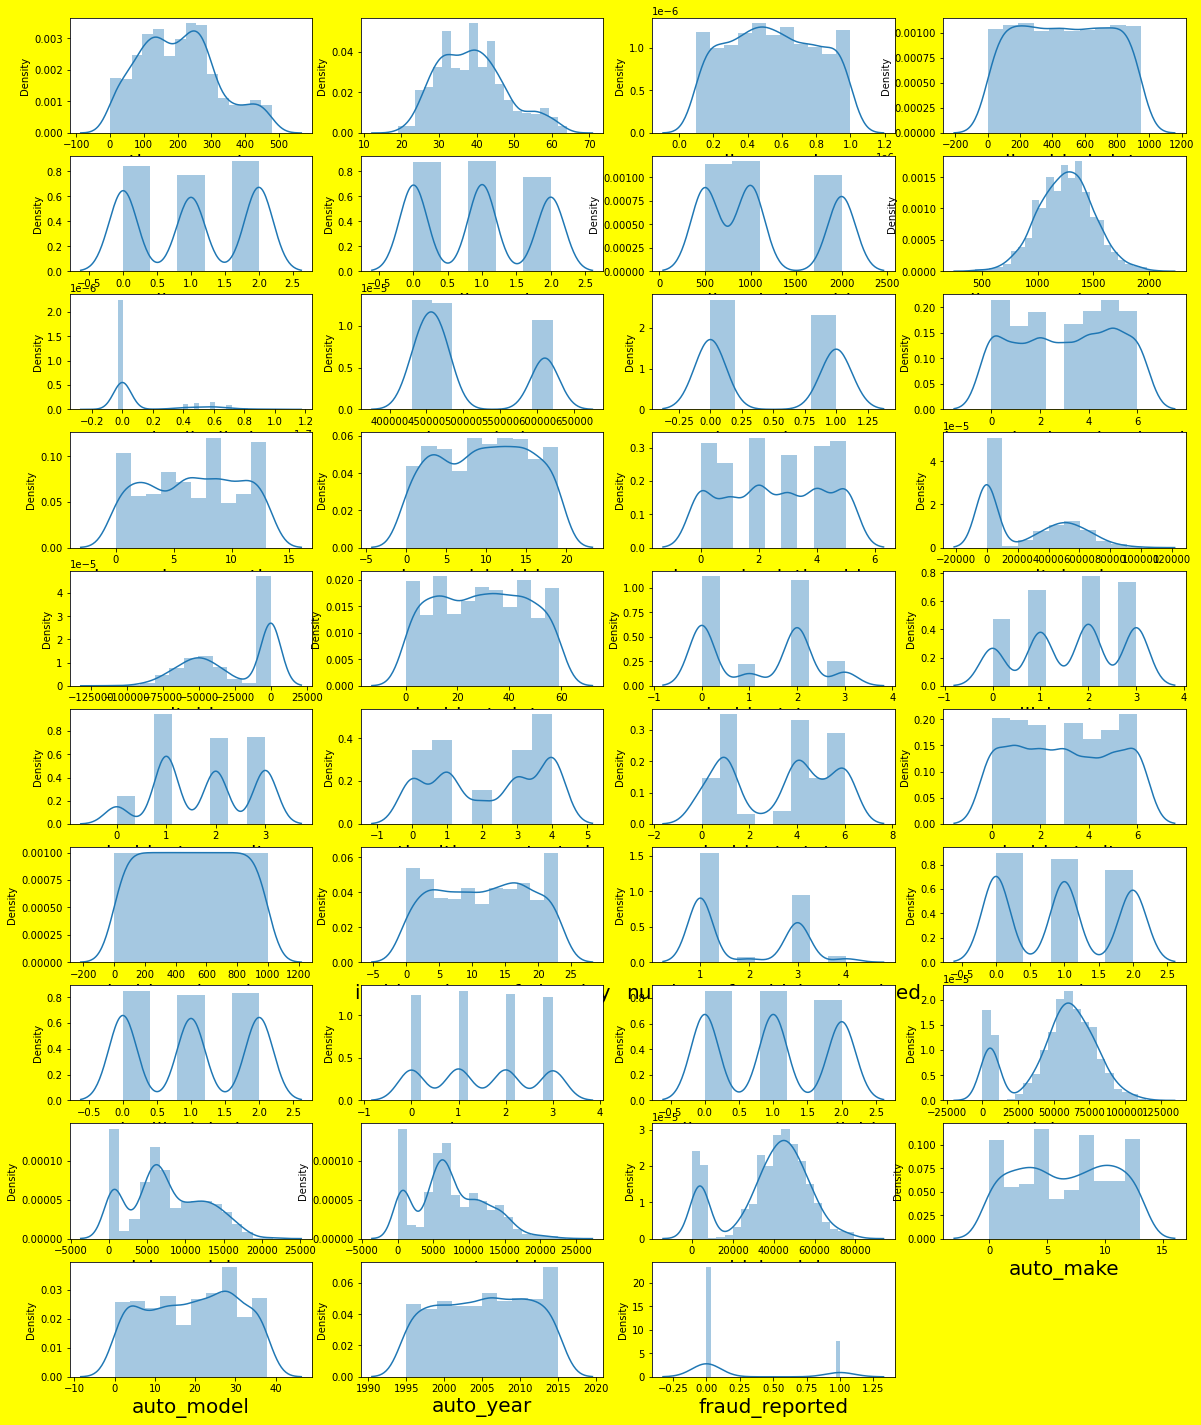

In [106]:
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber = 1

for column in df:
    if plotnumber<=40:
        ax = plt.subplot(10,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
    
plt.show()

In [107]:
# some data is normally distributed some is right skewed and some is left skewed

In [108]:
# second boxplot

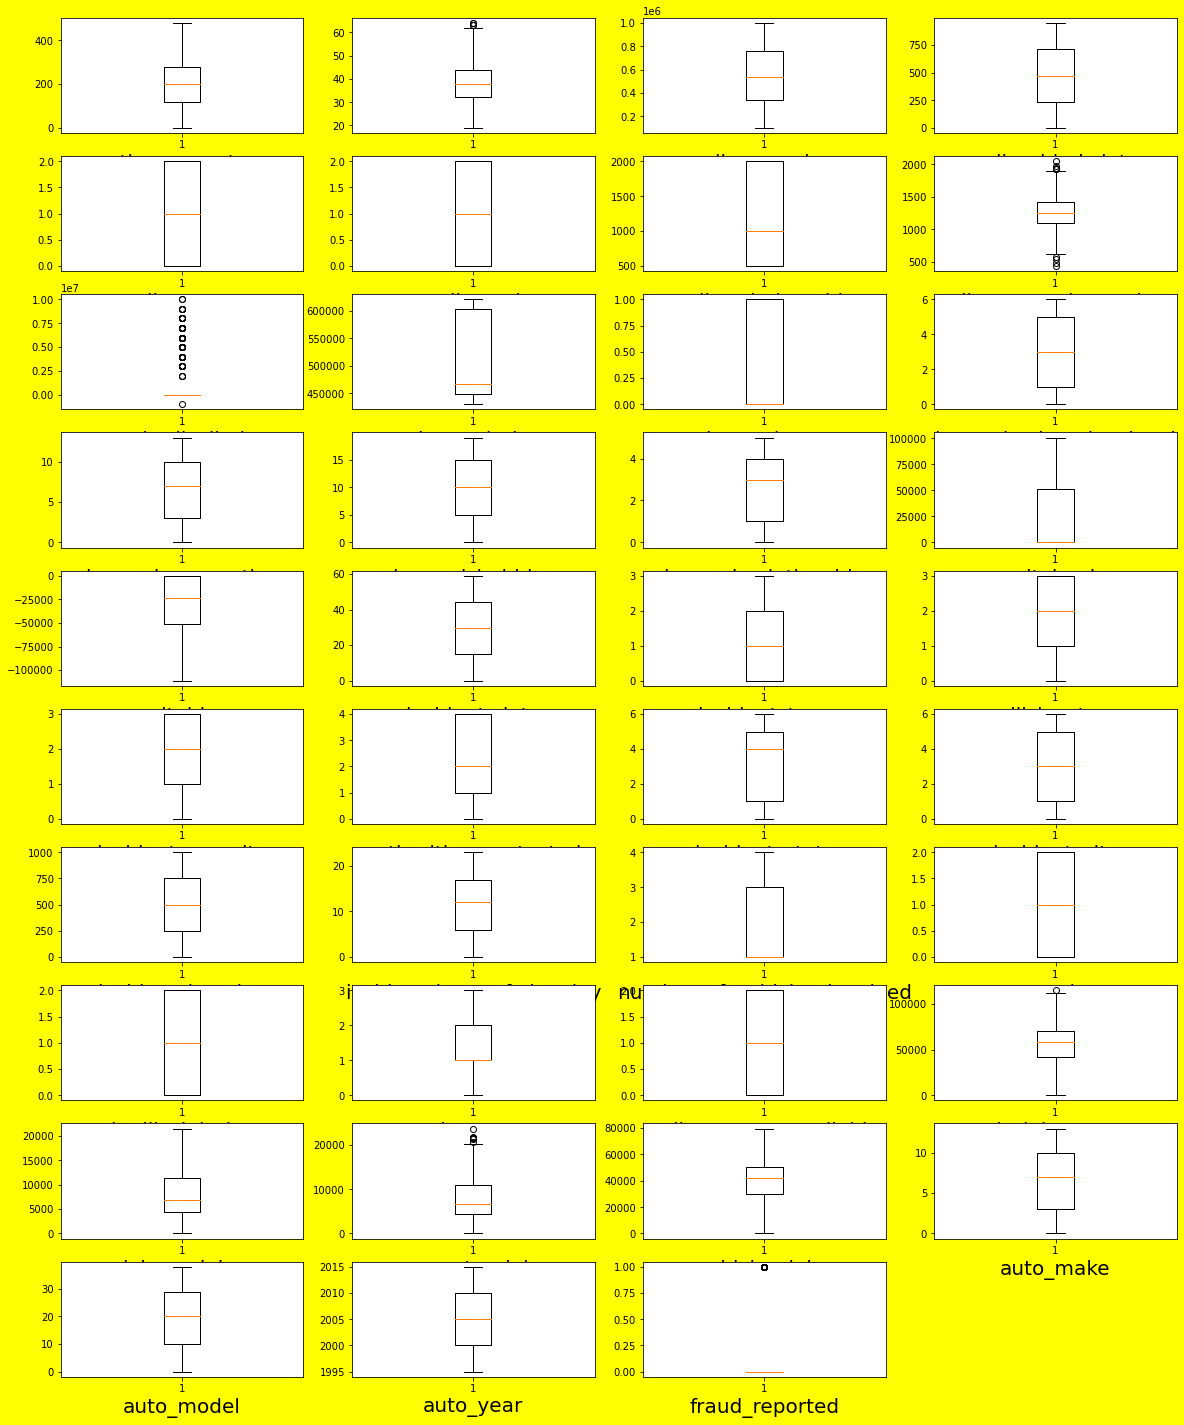

In [109]:
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber = 1

for column in df:
    if plotnumber<=40:
        ax = plt.subplot(10,4,plotnumber)
        plt.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
    
plt.show()

In [110]:
# some outliers are seen by plotting the boxplot

In [111]:
# taking out outliers by using zscore method

In [112]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [113]:
from scipy.stats import zscore

In [114]:
z_score = zscore(df[['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported']])

In [115]:
z_score = np.abs(z_score)

In [116]:
filter_entry = (z_score < 3).all(axis=1)

In [117]:
df1 = df[filter_entry]

In [118]:
df1

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,532,2,1,1000,1406.91,0,466132,...,2,2,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,821,1,1,2000,1197.22,5000000,468176,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,687698,186,2,0,2000,1413.14,5000000,430632,...,3,1,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,766,0,1,2000,1415.74,6000000,608117,...,2,1,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,181,0,2,1000,1583.91,6000000,610706,...,1,1,6500,1300,650,4550,0,31,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,487,2,2,1000,1310.80,0,431289,...,1,0,87200,17440,8720,61040,6,6,2006,0
996,285,41,186934,129,0,0,1000,1436.79,0,608177,...,3,0,108480,18080,18080,72320,13,28,2015,0
997,130,34,918516,509,2,1,500,1383.49,3000000,442797,...,3,2,67500,7500,7500,52500,11,19,1996,0
998,458,62,533940,573,0,2,2000,1356.92,5000000,441714,...,1,2,46980,5220,5220,36540,1,5,1998,0


In [119]:
# 20 rows removed having outliers

In [120]:
# again distribution plot

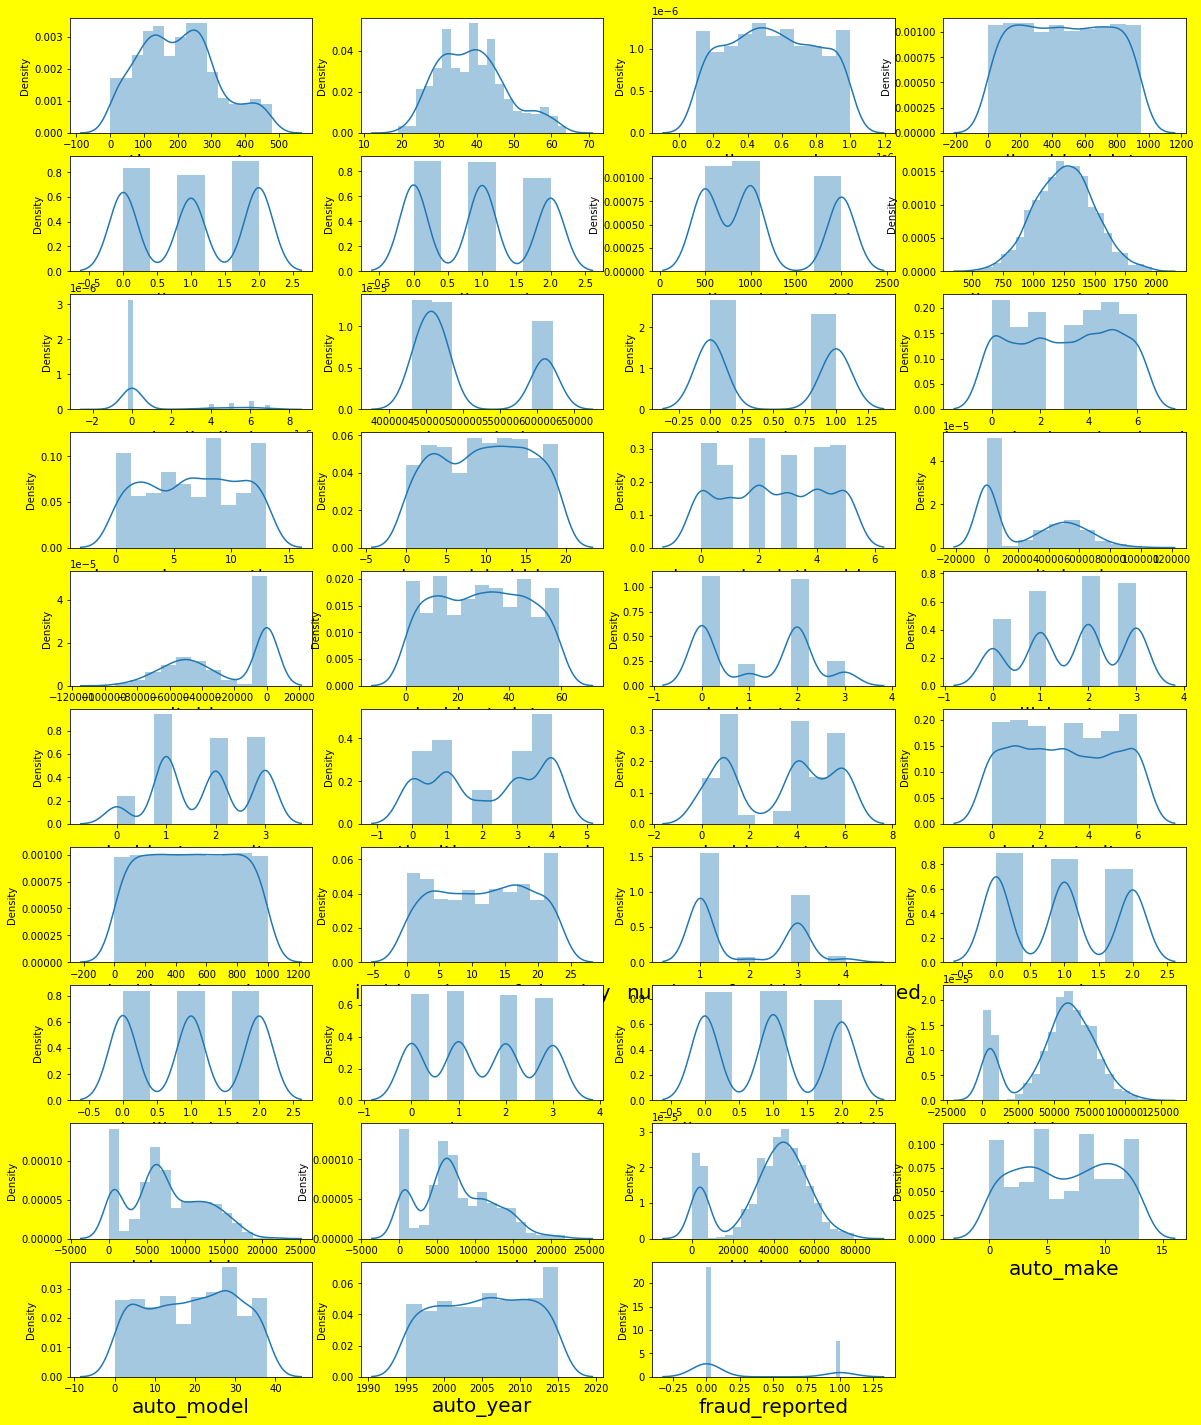

In [121]:
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber = 1

for column in df1:
    if plotnumber<=40:
        ax = plt.subplot(10,4,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
    
plt.show()

In [122]:
# looking better than earlier

In [123]:
# boxplot again

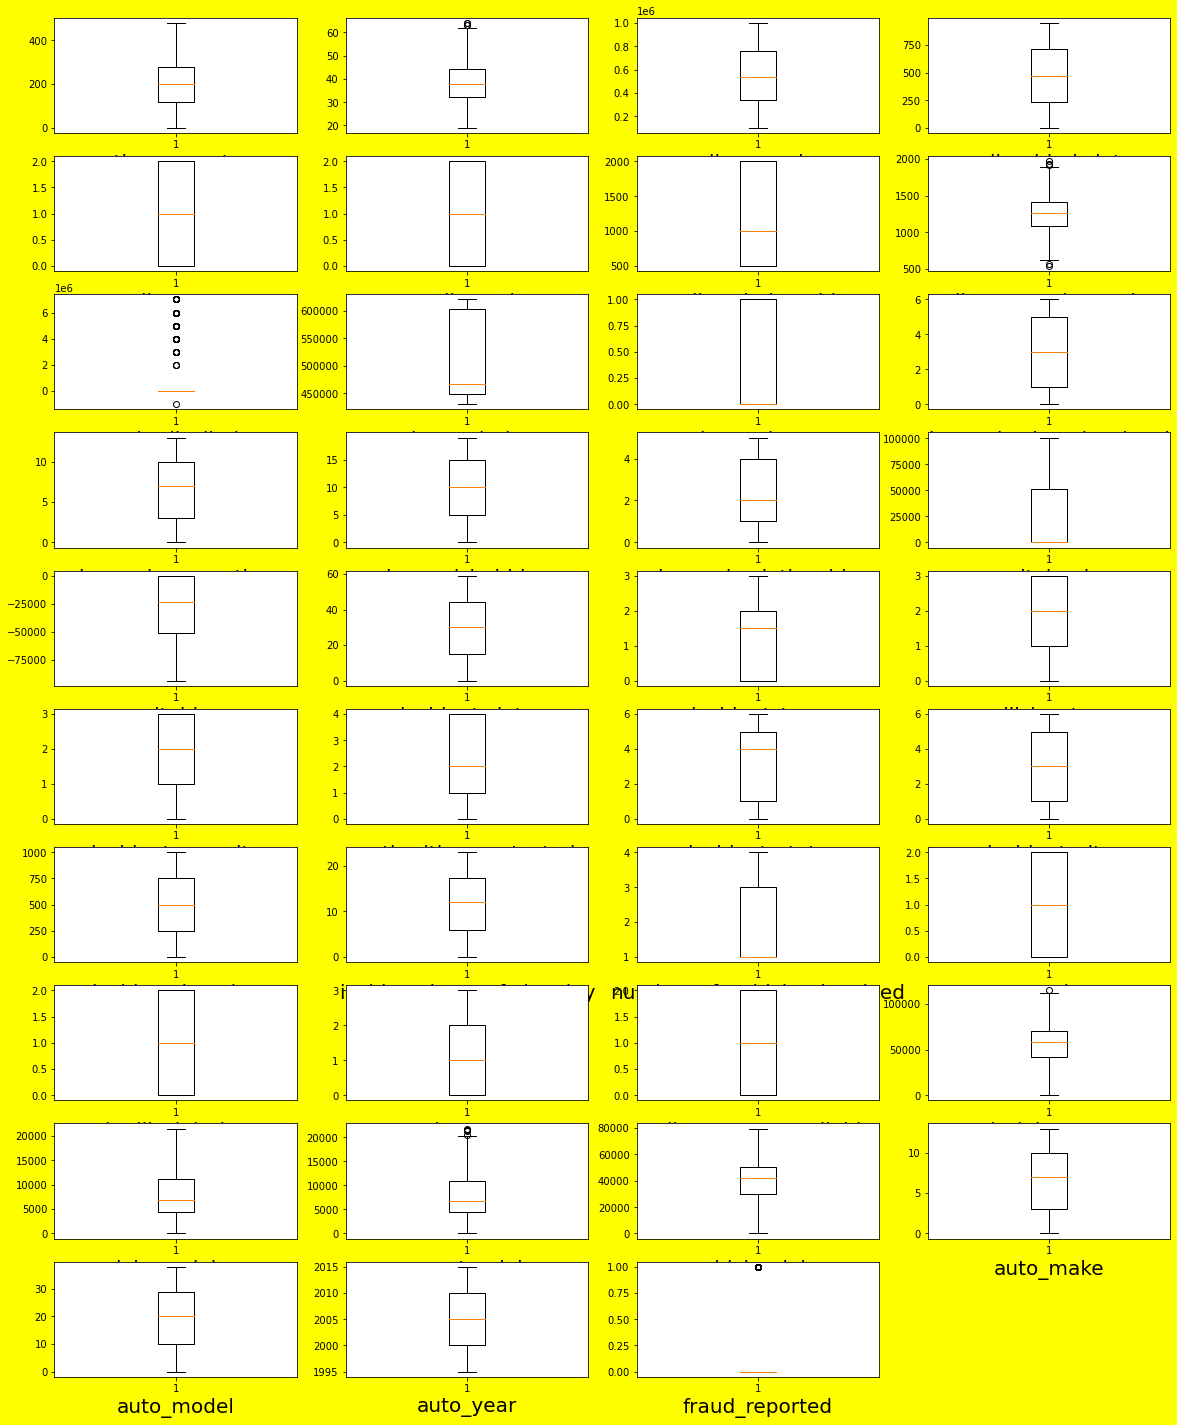

In [124]:
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber = 1

for column in df1:
    if plotnumber<=40:
        ax = plt.subplot(10,4,plotnumber)
        plt.boxplot(df1[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
    
plt.show()

In [125]:
# heatmap for checking multicollinearity

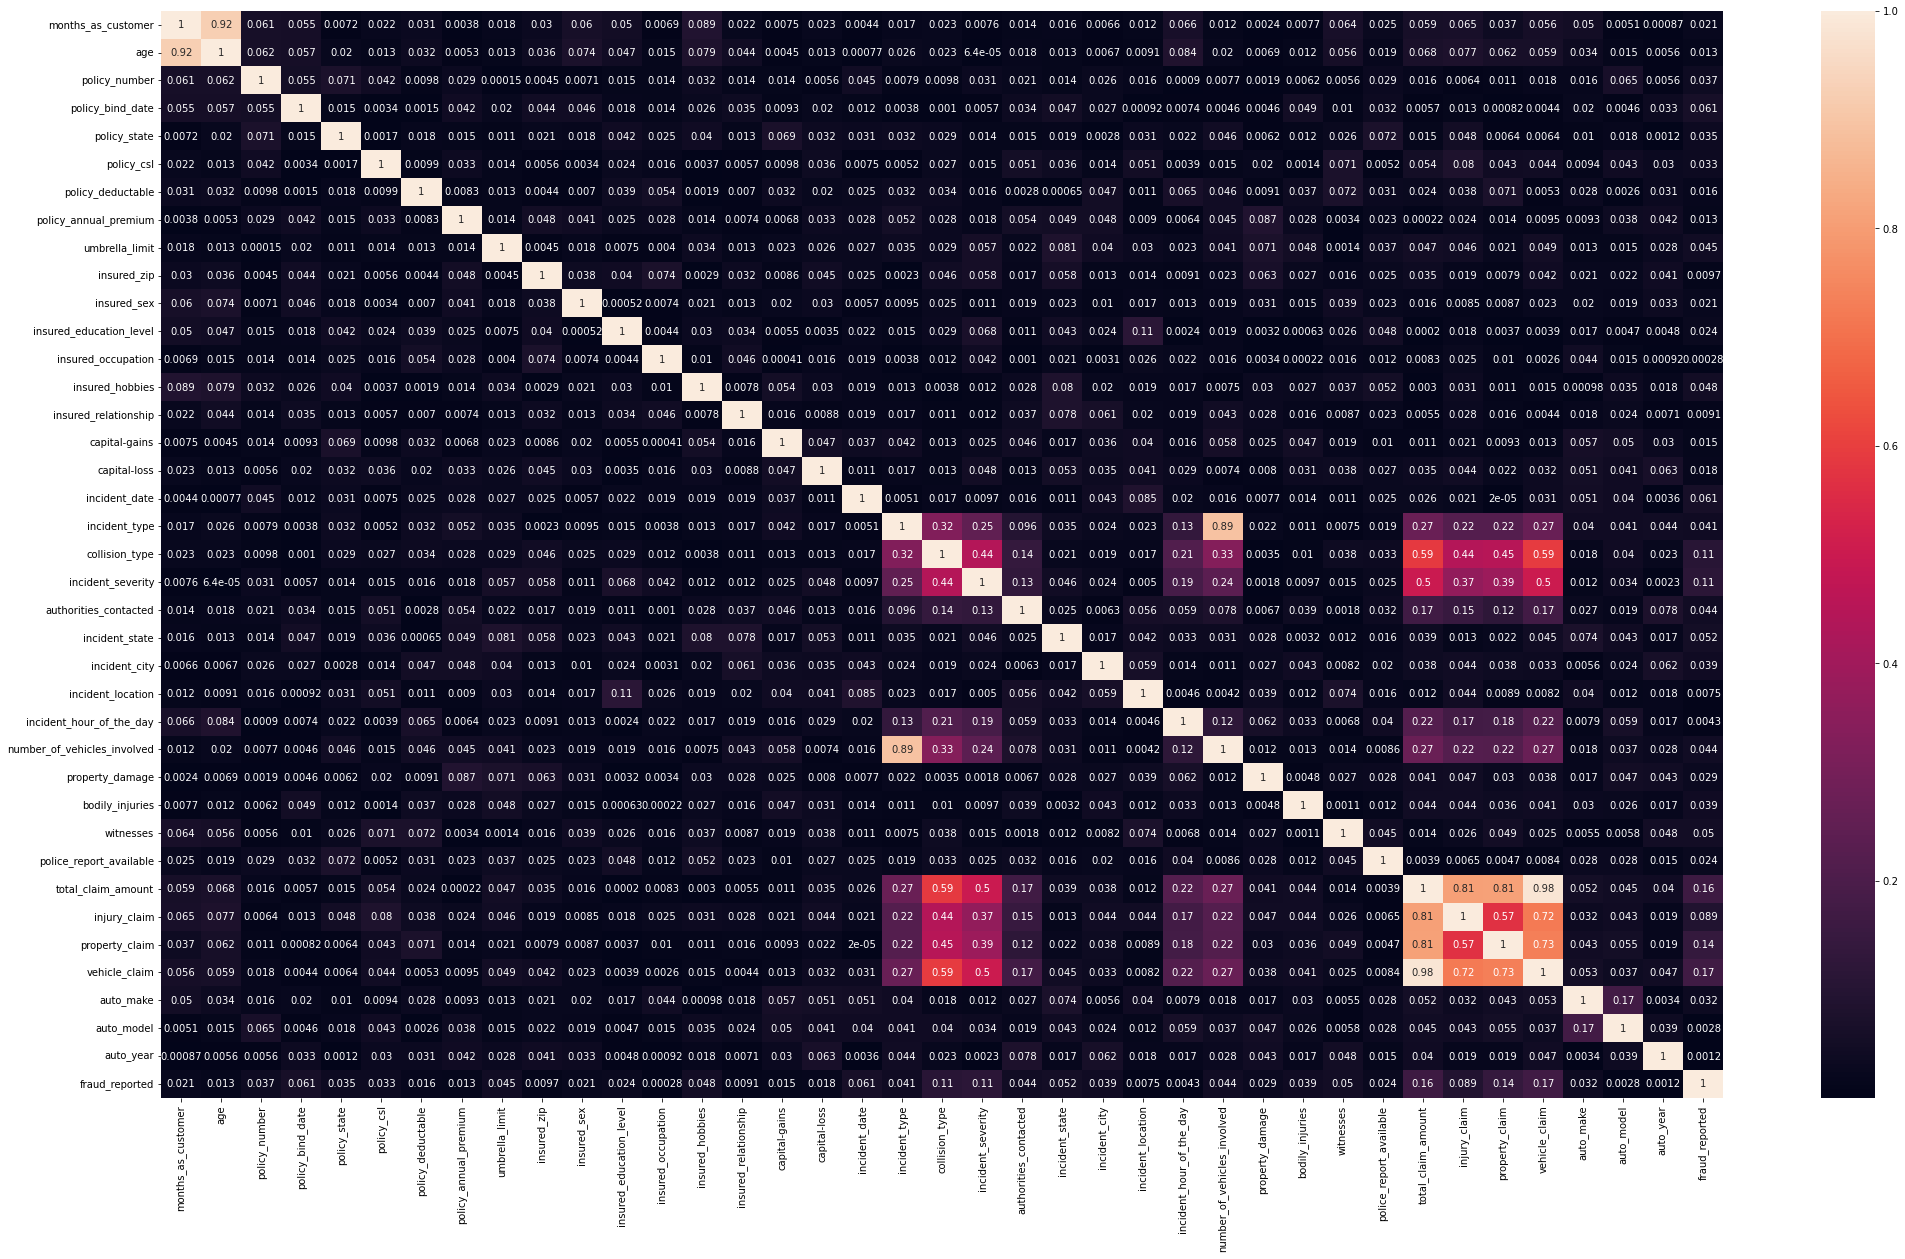

In [126]:
corr = df1.corr().abs()

plt.figure(figsize=(35,20))

sns.heatmap(corr,annot=True)

plt.show()

In [127]:
# scatter plot for those columns looking highly related to each other

In [128]:
#  first scatter plot

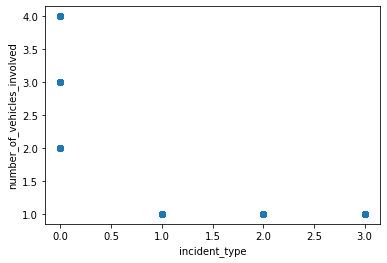

In [129]:
plt.scatter(df1.incident_type,df1.number_of_vehicles_involved)

plt.xlabel('incident_type')
plt.ylabel('number_of_vehicles_involved')
plt.show()

In [130]:
# no any trend seen in these columns

In [131]:
# second scatter plot

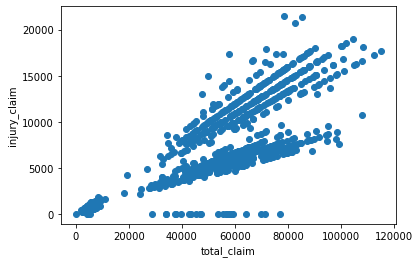

In [132]:
plt.scatter(df1.total_claim_amount,df1.injury_claim)

plt.xlabel('total_claim')
plt.ylabel('injury_claim')
plt.show()

In [133]:
# here it is, seems like these are related to each other

In [134]:
# dropping one of column from these two

In [135]:
df1 = df1.drop(columns='total_claim_amount')

In [136]:
# heatmap for checking again for remaining columns

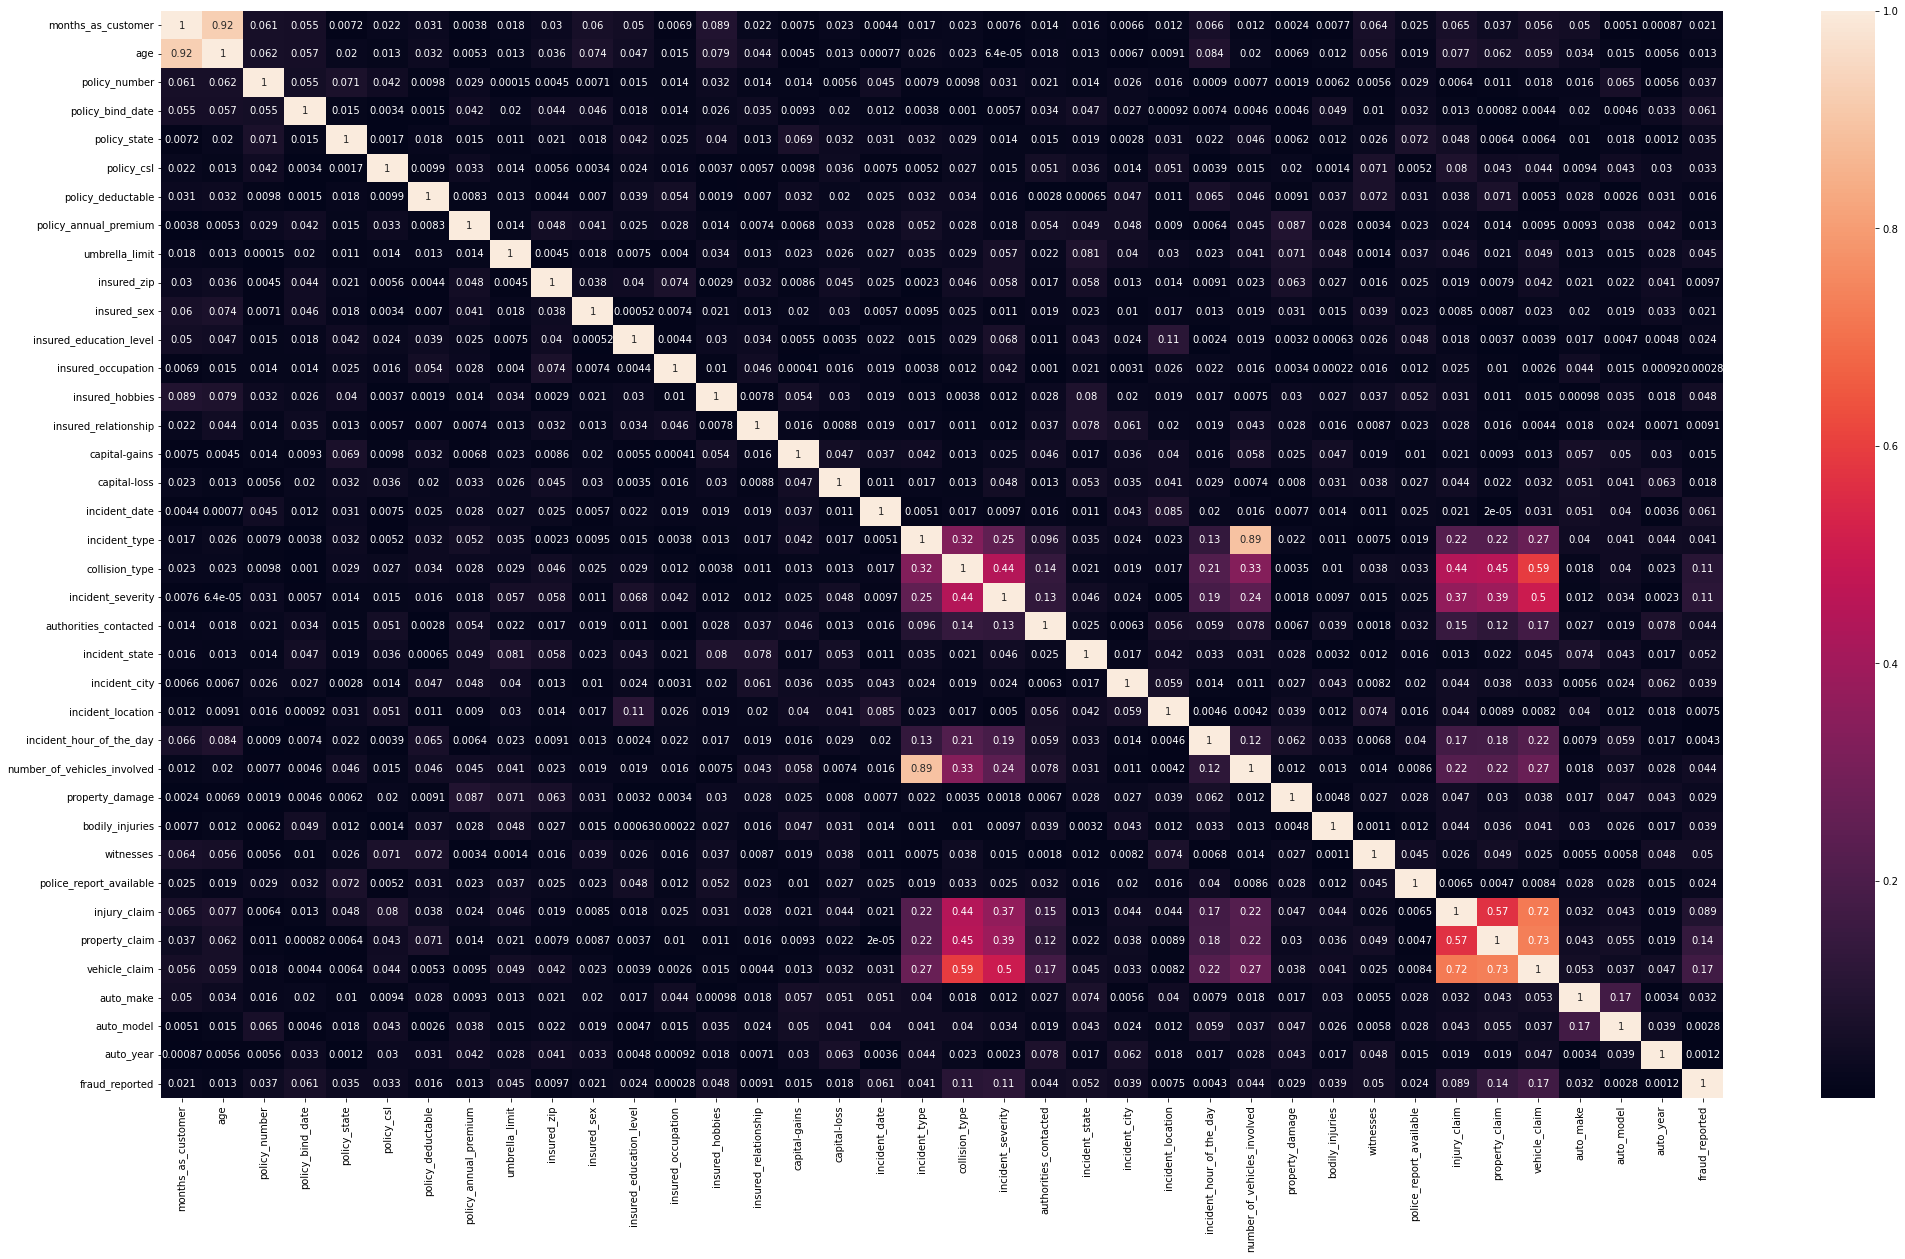

In [137]:
corr = df1.corr().abs()

plt.figure(figsize=(35,20))

sns.heatmap(corr,annot=True)

plt.show()

In [138]:
# checking again by plotting scatter plot between these two also

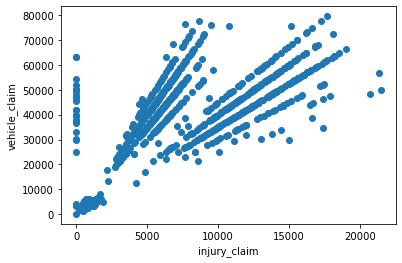

In [139]:
plt.scatter(df1.injury_claim,df1.vehicle_claim)

plt.xlabel('injury_claim')
plt.ylabel('vehicle_claim')

plt.show()

In [140]:
# here is also a trend, seems like that these also are related to each other

In [141]:
# drop one of these two

In [142]:
df1 = df1.drop(columns='vehicle_claim')

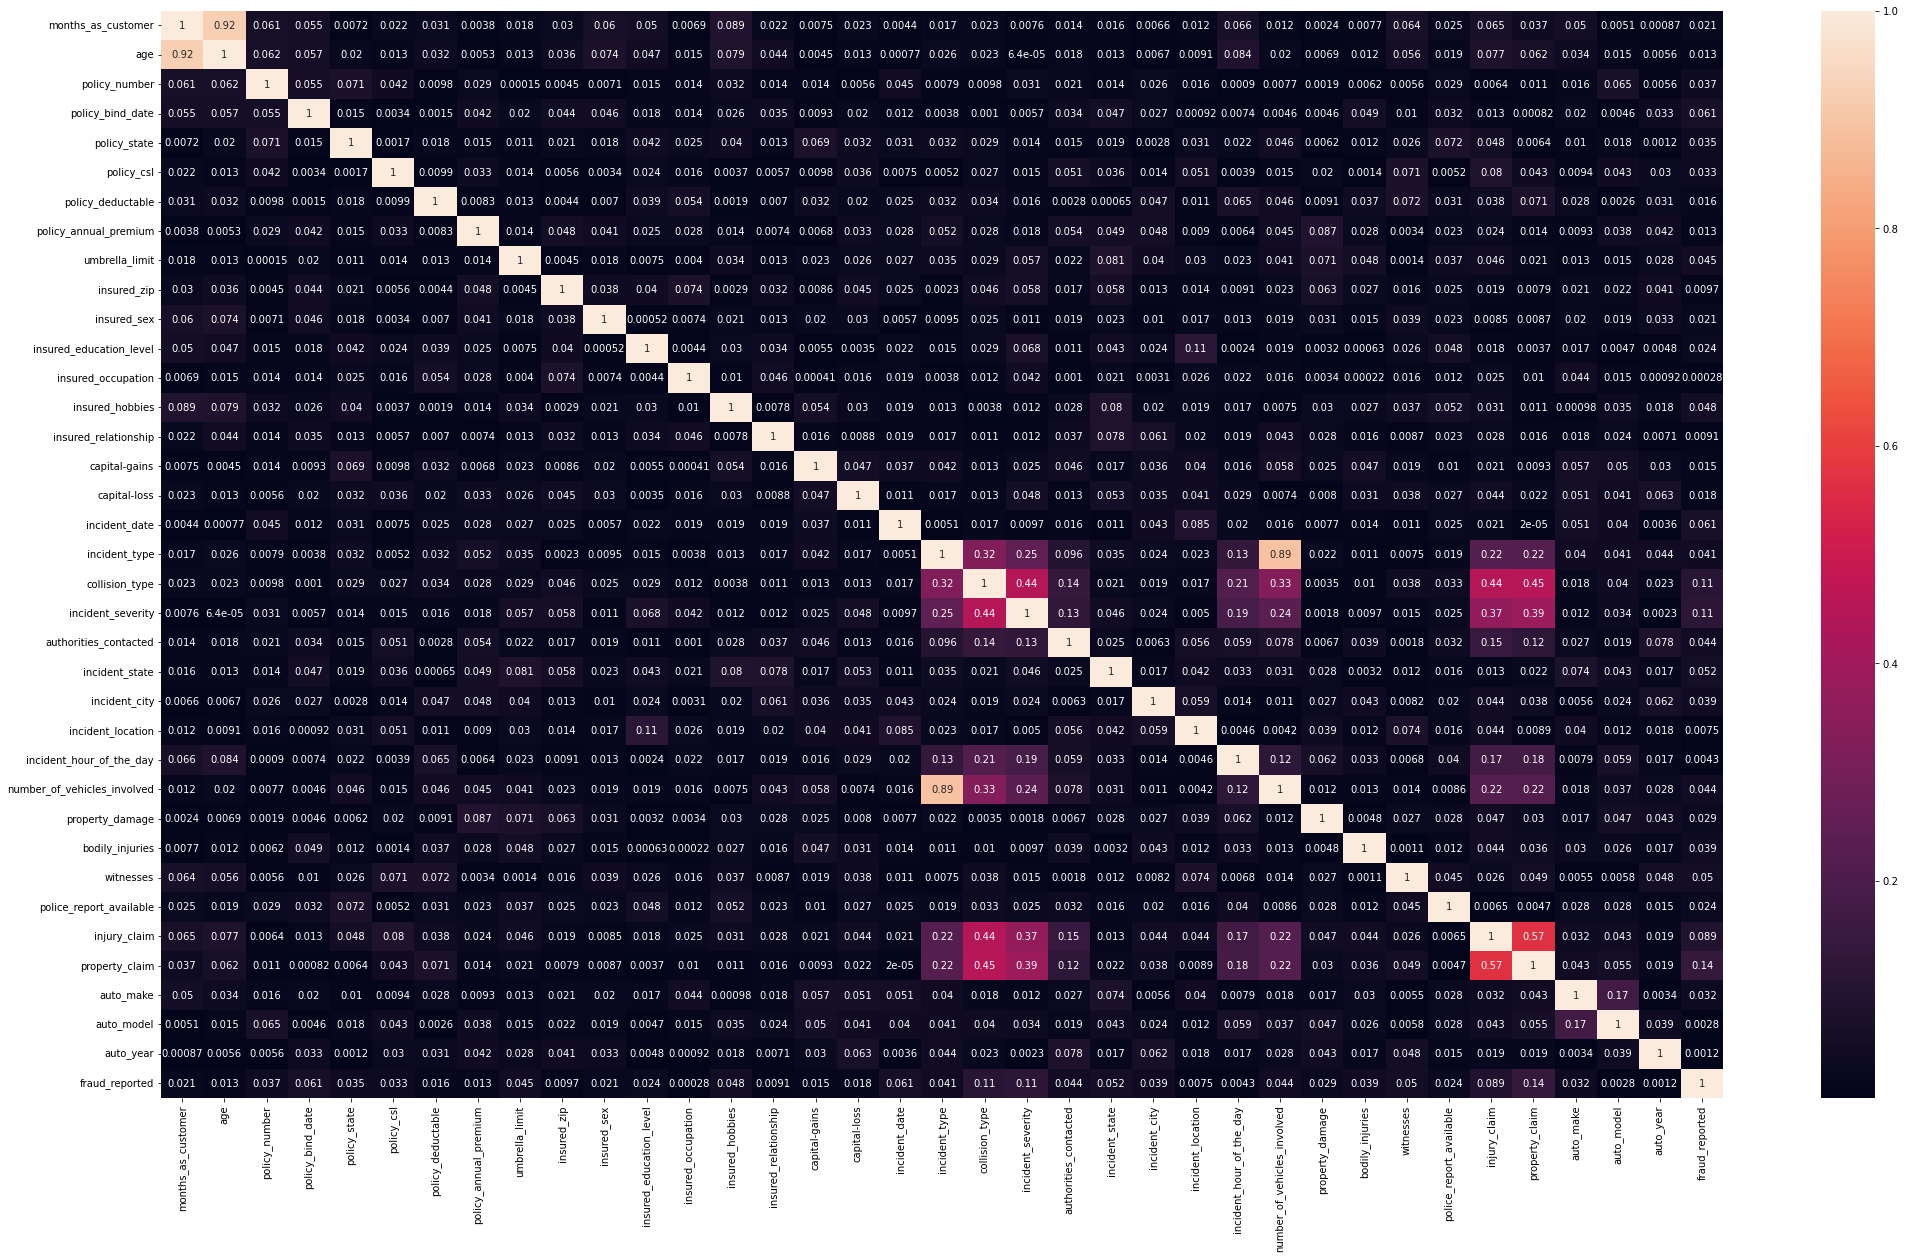

In [143]:
corr = df1.corr().abs()

plt.figure(figsize=(35,20))

sns.heatmap(corr,annot=True)

plt.show()

In [144]:
# splitting dataset into two variables for further process

In [145]:
x = df1.drop(columns='fraud_reported')

y = df1['fraud_reported']

In [146]:
# Standard scaler for standardize the data

# train_test_split

In [147]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

In [148]:
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [149]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=100)

In [150]:
# importing necessary libraries for checking the model accuracy and for plotting some graph

In [151]:
from sklearn.metrics import accuracy_score,classification_report,plot_roc_curve,roc_curve

In [152]:
# because it is classification problem so we train our data and predict by using classification models

In [153]:
# Logistic Regression

In [154]:
from sklearn.linear_model import LogisticRegression

In [155]:
lr = LogisticRegression()

lr.fit(x_train,y_train)

LogisticRegression()

In [156]:
lr_pred = lr.predict(x_test)

In [157]:
accuracy = accuracy_score(y_test,lr_pred)
accuracy

0.746938775510204

In [158]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.76      0.98      0.85       185
           1       0.25      0.02      0.03        60

    accuracy                           0.75       245
   macro avg       0.50      0.50      0.44       245
weighted avg       0.63      0.75      0.65       245



In [159]:
# Second Model -- Decision Tree

In [160]:
from sklearn.tree import DecisionTreeClassifier

In [161]:
dt = DecisionTreeClassifier()

dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [162]:
dt_pred = dt.predict(x_test)

In [163]:
accuracy = accuracy_score(y_test,dt_pred)
accuracy

0.8204081632653061

In [164]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       185
           1       0.63      0.63      0.63        60

    accuracy                           0.82       245
   macro avg       0.76      0.76      0.76       245
weighted avg       0.82      0.82      0.82       245



In [165]:
# Third Model -- Random Forest

In [166]:
from sklearn.ensemble import RandomForestClassifier

In [167]:
rf = RandomForestClassifier()

rf.fit(x_train,y_train)

RandomForestClassifier()

In [168]:
rf_pred = rf.predict(x_test)

In [169]:
accuracy = accuracy_score(y_test,rf_pred)
accuracy

0.7714285714285715

In [170]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87       185
           1       1.00      0.07      0.12        60

    accuracy                           0.77       245
   macro avg       0.88      0.53      0.50       245
weighted avg       0.82      0.77      0.69       245



In [171]:
# Fourth Model -- Support Vector Machine

In [172]:
from sklearn.svm import SVC

In [173]:
svc = SVC()

svc.fit(x_train,y_train)

SVC()

In [174]:
svc_pred = svc.predict(x_test)

In [175]:
accuracy = accuracy_score(y_test,svc_pred)
accuracy

0.7551020408163265

In [176]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86       185
           1       0.00      0.00      0.00        60

    accuracy                           0.76       245
   macro avg       0.38      0.50      0.43       245
weighted avg       0.57      0.76      0.65       245



In [177]:
# let's check model understanding and model prediction by plotting roc_curve

In [178]:
from sklearn.metrics import plot_roc_curve,roc_curve

In [179]:
# for training data, how much our model understood the data

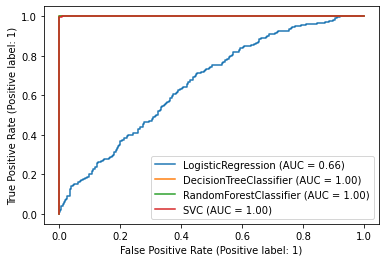

In [180]:
disp = plot_roc_curve(lr,x_train,y_train)
plot_roc_curve(dt,x_train,y_train,ax = disp.ax_)
plot_roc_curve(rf,x_train,y_train,ax = disp.ax_)
plot_roc_curve(svc,x_train,y_train,ax = disp.ax_)

plt.show()

In [181]:
# for test data, how our model works on data

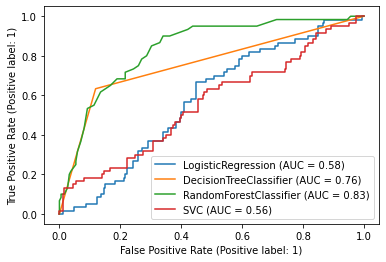

In [182]:
disp = plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(dt,x_test,y_test,ax = disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax = disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax = disp.ax_)

plt.show()

In [183]:
# all observations are here, our four models are working well

In [184]:
# we can select anyone from these

# saving the model

In [185]:
import pickle

In [186]:
pickle.dump(rf,open('rf_cl_Ins.Fraud','wb'))